In [35]:
import sys
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import zipfile
import io
import re
import IPython.display as ipd
from tensorflow.keras.utils import normalize

In [2]:
data = []
labels = []
root = "audio_data/training_data"

In [4]:
for cd, subdirs, files in os.walk(root, topdown=False):
    hl, kl, tl = re.split("[\\\\/]", cd)[-3:]
    if (kl == "ride" and tl=="normal"):
        for name in files[0:10]:
            data.append(np.loadtxt(os.path.join(cd, name)))
            labels.append({"hit-label": hl, "kit-labels": kl, "tech-labels": tl})
        break
labels

[{'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'bell'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'ride', 'tech-labels': 'normal'},
 {'hit-label

In [5]:
[2**i for i in range(20)]

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288]

A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)


c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
c:\python37\lib\site-packages\matplotlib\axes\_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


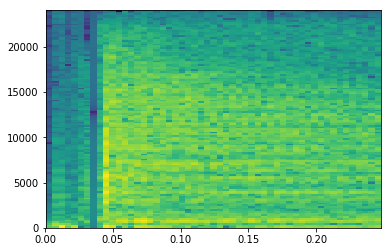

In [6]:
nfft = 256
window_f = signal.windows.hann(nfft)
overlap = 32
fs = 48000
spectrograms_a, linear_spectrograms_a, spectrograms_b, linear_spectrograms_b = [], [], [], []
for d in data:
    f1, t1, Sxx1 = signal.spectrogram(d, fs=fs, window=window_f, nfft=nfft, noverlap=overlap)
    log_Sxx1 = 10*np.log10(Sxx1)
    log_Sxx1[log_Sxx1 == -np.inf] = 0
    min1 = np.amin(log_Sxx1)
    log_Sxx1[log_Sxx1 == 0] = min1
    linear_spectrograms_a.append((f1, t1, Sxx1))
    spectrograms_a.append((f1, t1, log_Sxx1))
    Sxx2, f2, t2, im = plt.specgram(x=d, Fs=fs, window=window_f, NFFT=nfft , noverlap=overlap)
    log_Sxx2 = 10*np.log10(Sxx2)
    log_Sxx2[log_Sxx2 == -np.inf] = 0
    min2 = np.amin(log_Sxx2)
    log_Sxx2[log_Sxx2 == 0] = min2
    linear_spectrograms_b.append((f2, t2, Sxx2))
    spectrograms_b.append((f2, t2, log_Sxx2))
    print("A:", Sxx1.shape, "\tB:", Sxx2.shape)

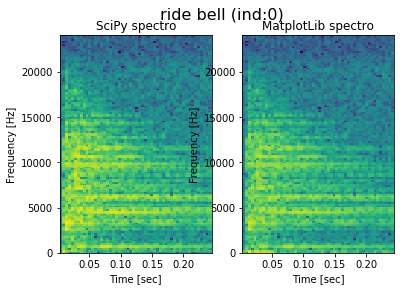

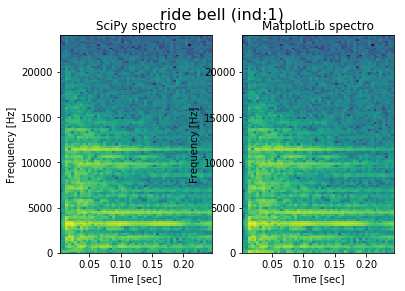

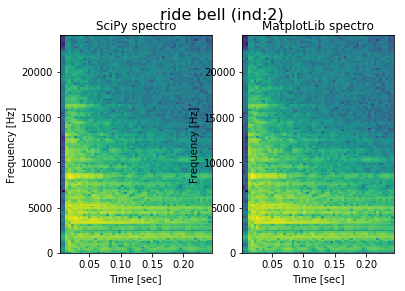

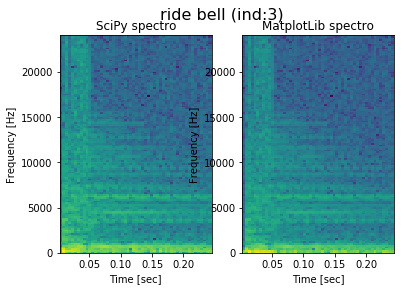

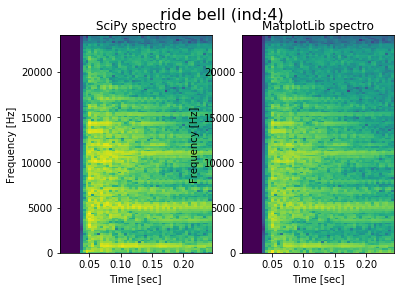

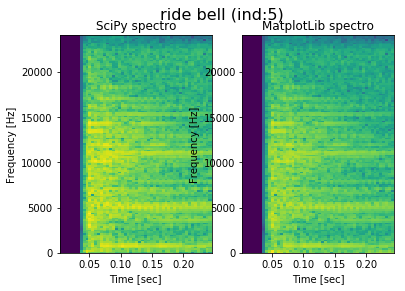

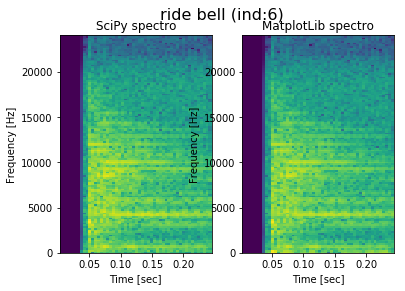

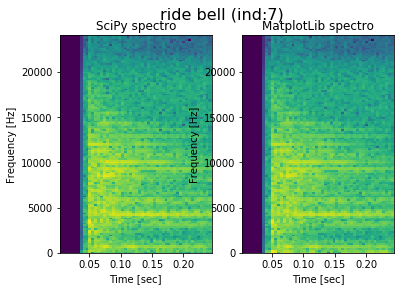

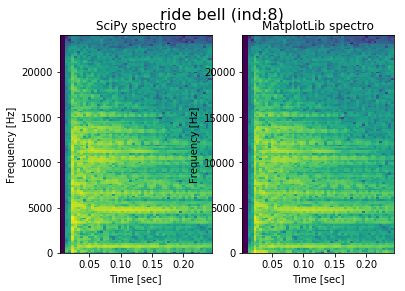

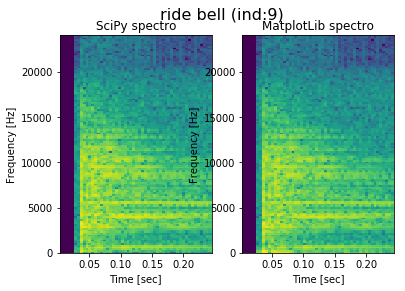

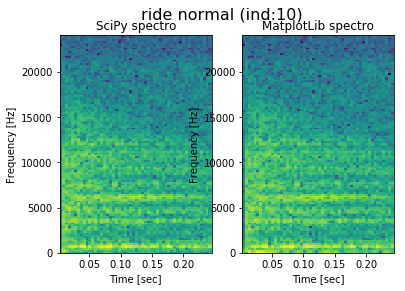

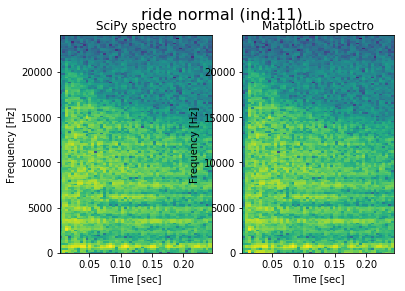

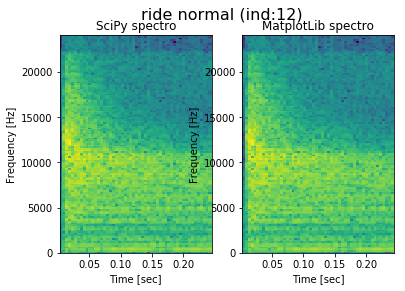

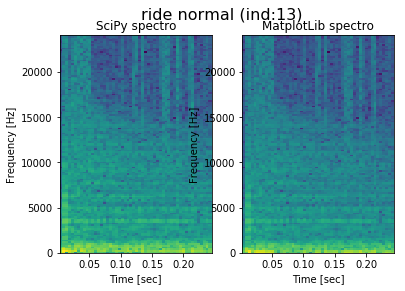

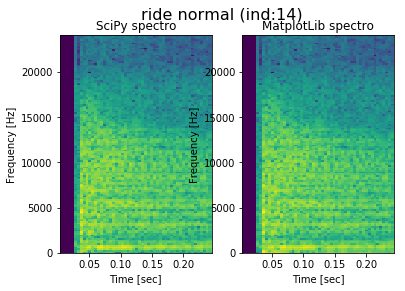

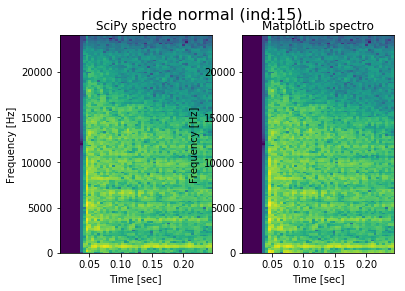

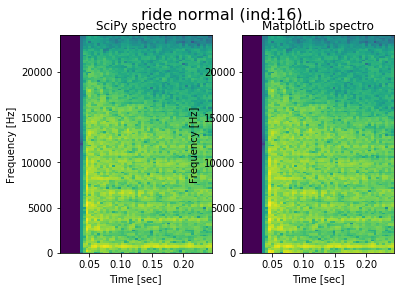

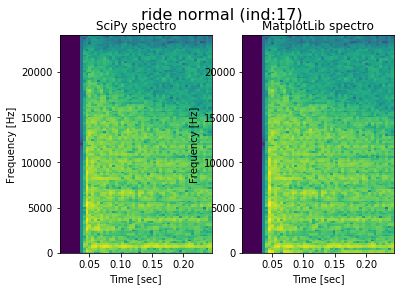

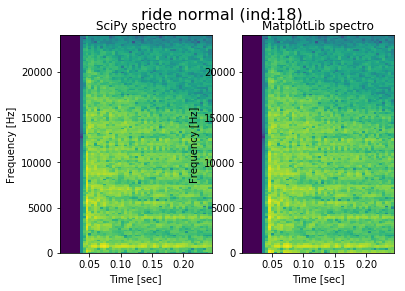

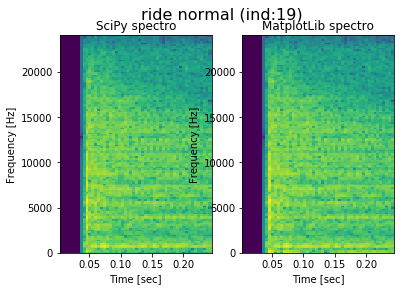

In [7]:
for i in range(len(spectrograms_a)):
    f1, t1, Sxx1 = spectrograms_a[i]
    f2, t2, Sxx2 = spectrograms_b[i]
    # Make Sxx logarithmic (db is a logarithmic scale) but make sure (muted sections of audio) 0 values are normalised so that -inf terms are avoided.
    label = labels[i]
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.pcolormesh(t1, f1, Sxx1)
    ax1.set_ylabel('Frequency [Hz]')
    #ax1.set_ylim((0, 8000))
    ax1.set_xlabel('Time [sec]')
    ax1.set_title("SciPy spectro")
    ax2.pcolormesh(t2, f2, Sxx2)
    ax2.set_ylabel('Frequency [Hz]')
    #ax2.set_ylim((0, 8000))
    ax2.set_xlabel('Time [sec]')
    ax2.set_title("MatplotLib spectro")
    fig.suptitle('{} {} (ind:{})'.format(label["kit-labels"], label["tech-labels"], i), fontsize=16)
    plt.show()

In [7]:
ipd.Audio(data=data[4], rate=48000)

In [8]:
spectrograms_a[0][2]

array([[-131.31753702, -113.08440766, -124.07636235, ..., -146.48481957,
        -127.1261809 , -128.55633134],
       [-127.31695603, -106.79075772, -110.58712216, ..., -126.80547227,
        -132.8917661 , -123.54911274],
       [-126.37298803, -112.3123817 , -120.07344873, ..., -123.48242161,
        -125.9271019 , -121.92682448],
       ...,
       [-145.94044778, -160.60562886, -152.90937156, ..., -168.6329996 ,
        -148.21170285, -158.91844734],
       [-142.96391676, -145.7433034 , -151.51007739, ..., -154.11678978,
        -147.71850126, -151.66875984],
       [-150.02889562, -146.21348114, -156.29322595, ..., -161.2404635 ,
        -147.27430887, -150.59537401]])

In [9]:
np.array(spectrograms_a).shape

(10, 3)

In [10]:
linear_spectrograms_a[0][2]

array([[7.38322831e-14, 4.91540417e-12, 3.91168402e-13, ...,
        2.24656011e-15, 1.93812557e-13, 1.39433416e-13],
       [1.85483122e-13, 2.09374712e-11, 8.73550033e-12, ...,
        2.08666520e-13, 5.13834653e-14, 4.41660669e-13],
       [2.30516065e-13, 5.87167258e-12, 9.83230013e-13, ...,
        4.48495241e-13, 2.55440532e-13, 6.41678595e-13],
       ...,
       [2.54656767e-15, 8.69835472e-17, 5.11755883e-16, ...,
        1.36993525e-17, 1.50948818e-15, 1.28278912e-16],
       [5.05368680e-15, 2.66483093e-15, 7.06304969e-16, ...,
        3.87544004e-16, 1.69102440e-15, 6.80963785e-16],
       [9.93368622e-16, 2.39139813e-15, 2.34788816e-16, ...,
        7.51542682e-17, 1.87313515e-15, 8.71891811e-16]])

In [71]:
normalized_linear_spectrogram1, normalized_linear_spectrogram2 = normalize(linear_spectrograms_a[12][2]), normalize(linear_spectrograms_a[1][2])
normalized_spectrogram1, normalized_spectrogram2 = normalize(spectrograms_a[12][2]), normalize(spectrograms_a[1][2])

In [ ]:
normalized_spectrogram.shape

In [ ]:
normalized_spectrogram

In [ ]:
plt.plot(range(53), normalized_spectrogram[0])

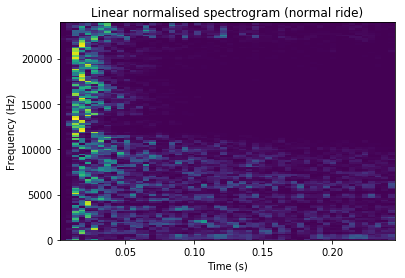

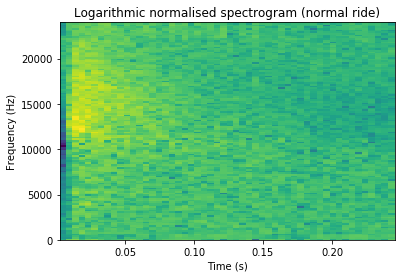

In [72]:
plt.pcolormesh(spectrograms_a[0][1], spectrograms_a[10][0], normalized_linear_spectrogram1)
plt.title("Linear normalised spectrogram (normal ride)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
plt.pcolormesh(spectrograms_a[0][1], spectrograms_a[10][0], normalized_spectrogram1)
plt.title("Logarithmic normalised spectrogram (normal ride)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

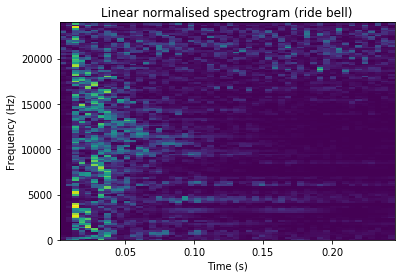

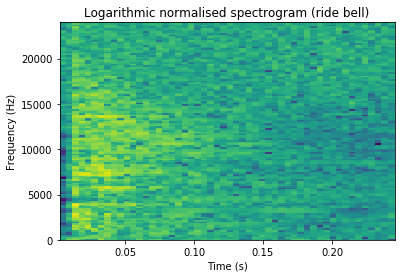

In [70]:
plt.pcolormesh(spectrograms_a[0][1], spectrograms_a[11][0], normalized_linear_spectrogram2)
plt.title("Linear normalised spectrogram (ride bell)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
plt.pcolormesh(spectrograms_a[0][1], spectrograms_a[11][0], normalized_spectrogram2)
plt.title("Logarithmic normalised spectrogram (ride bell)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [ ]:
plt.pcolormesh(spectrograms_a[0][1], spectrograms_a[0][0], normalized_linear_spectrogram)

In [ ]:
def clipped_log_spectrogram(data):
    Sxx = signal.spectrogram(data, fs=48000, window=window_f, nfft=nfft, noverlap=overlap)[2]
    Sxx[Sxx == 0] = 1
    min_Sxx = np.amin(Sxx)
    Sxx[Sxx == 1] = min_Sxx
    return normalize(np.log10(Sxx))

In [ ]:
input_types = {0: lambda data: data, 1: clipped_log_spectrogram, 2: lambda data: normalize(signal.spectrogram(data, fs=48000, window=window_f, nfft=nfft, noverlap=overlap)[2])}

In [ ]:
for i in range(3):
    input_data = input_types[i](data[0])
    print("\nShape:", input_data.shape, "\n", input_data)

In [ ]:
for i in range(3):
    input_data = input_types[i](data[9])
    print("\nShape:", input_data.shape, "\n", input_data)